[1.5, 5.5, 9.5, 13.5]
['Other\n(not X or Y)', 'chrX', 'chrY\n(full)', 'chrY\n(no HET)']
[1.5, 5.5, 9.5, 13.5]
['Other\n(not X or Y)', 'chrX', 'chrY\n(full)', 'chrY\n(no HET)']


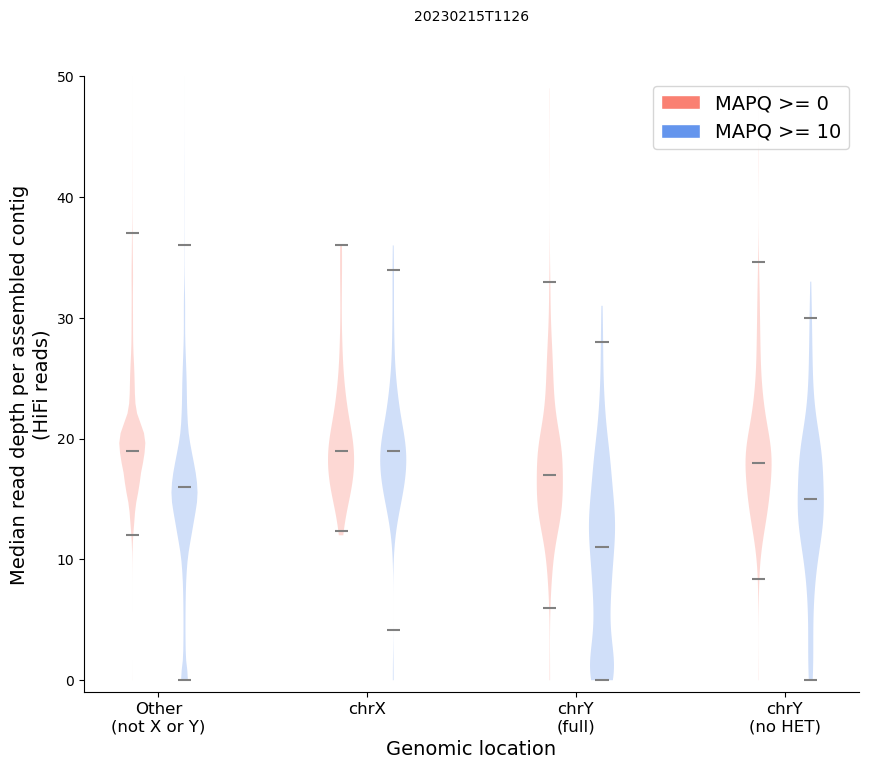

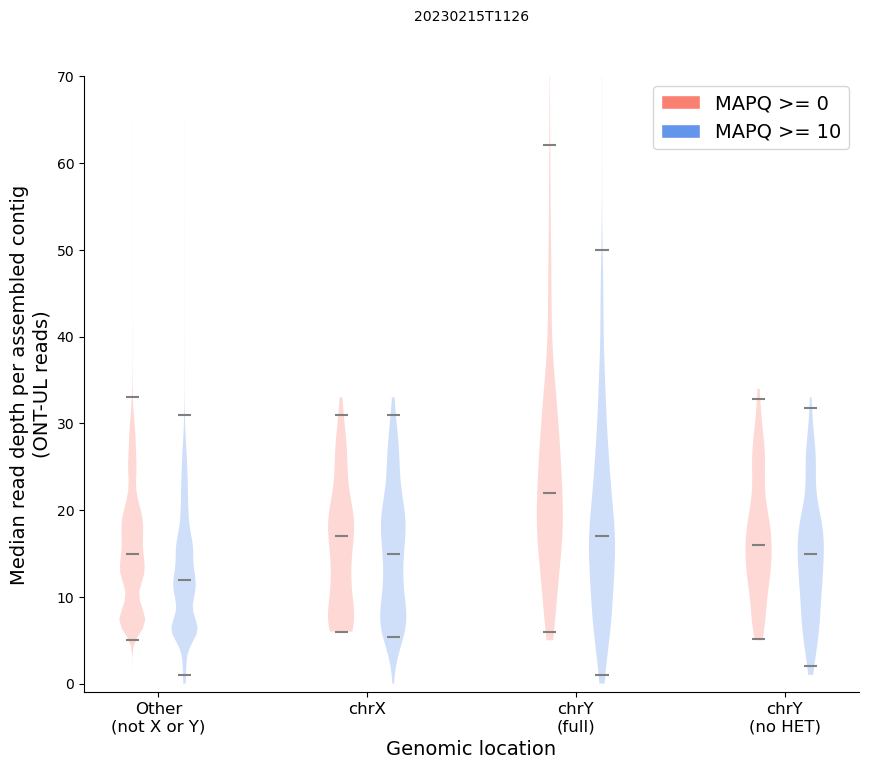

In [18]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpat
import datetime as dt

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

datetime_now = dt.datetime.now()
timestamp = datetime_now.strftime("%Y%m%dT%H%M")

table = pd.read_csv(
    "ALL-SAMPLES.READS_aln-to_HIFIRW.ONTUL.na.wg.cov-stats.tsv",
    header=0,
    index_col=["location", "statistic", "reads", "min_mapq", "input_set"],
    sep="\t"
)

drop_samples = [
    "HG02666",
    "NA18989",
    "HG01457",
    "NA19384"
]

table = table.loc[~table["sample"].isin(drop_samples), :].copy()

box_plots = []
box_positions = []

labels = []
label_pos = []
quantiles = []

box_pos = 1

for reads in ["HIFIRW", "ONTUL"]:
    for loc, input_set in [("auto", "wg"), ("chrX", "wg"), ("chrY", "wg"), ("chrY", "noYHET")]:
        if box_pos > 1:
            box_pos += 2
        for mapq in [0, 10]:
            values = table.xs(
                (loc, input_set, mapq, reads, "median_cov"),
                level=["location", "input_set", "min_mapq", "reads", "statistic"]
            )
            #labels.append(f"{loc}_MQ{mapq}")
            box_plots.append(values["value"])
            box_positions.append(box_pos)
            if mapq < 10:
                label_pos.append(box_pos + 0.5)
                if loc == "auto":
                    label = "Other\n(not X or Y)"
                elif loc == "chrY" and input_set == "wg":
                    label = "chrY\n(full)"
                elif loc == "chrY":
                    label = "chrY\n(no HET)"
                else:
                    label = "chrX"
                labels.append(label)
            box_pos += 1
            quantiles.append([0.01,0.99])
            
    fig, ax = plt.subplots(figsize=(10, 8))
    violins = ax.violinplot(
        box_plots,
        positions=box_positions,
        showmedians=True,
        showextrema=False,
        quantiles=quantiles
    )
    for idx, violin in enumerate(violins["bodies"]):
        if idx % 2 == 1:
            violin.set_facecolor("cornflowerblue")
        else:
            violin.set_facecolor("salmon")
    violins["cmedians"].set_color("grey")
    violins["cquantiles"].set_color("grey")
    print(label_pos)
    print(labels)
    ax.set_xticks(label_pos, labels, fontsize=12)
    readset = "HiFi" if reads == "HIFIRW" else "ONT-UL"
    ax.set_ylabel(f"Median read depth per assembled contig\n({readset} reads)", fontsize=14)
    ax.set_xlabel("Genomic location", fontsize=14)
    if reads == "HIFIRW":
        ax.set_ylim(-1, 50)
    else:
        ax.set_ylim(-1, 70)
    
    custom_legend = []
    custom_legend.append(
        mpat.Patch(facecolor="salmon", label="MAPQ >= 0", edgecolor="white")
    )
    custom_legend.append(
        mpat.Patch(facecolor="cornflowerblue", label="MAPQ >= 10", edgecolor="white")
    )
    ax.legend(handles=custom_legend, fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(timestamp, pad=40, fontsize=10)

    labels = []
    label_pos = []
    box_plots = []
    box_pos = 1
    box_positions = []
    quantiles = []
    
    